# Setups and Imports

In [ ]:
%%capture
!pip install wandb

**Wandb:** is one of interesting tools developped to track the real-time performance of models for different executions. Wandb means Weights and Biases(Wandb). Wandb organize and analyze your machine learning experiments. It is lighter than a tensorboard toolkit. With a few lines of code, wandb saves your model’s hyperparameters and output metrics and gives you all visual charts like for training, comparison of model, accuracy, etc.

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import activations

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import re

2.9.2


In [ ]:
import wandb
from wandb.keras import WandbCallback

wandb.login()

wandb: Currently logged in as: baptiste-guillemin-pro. Use `wandb login --relogin` to force relogin


True

# One to Many

#### Create Dataset

Create a dataset compsed of : 

Input: x = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]

Output Y = [[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]

So, our problem is to predict the next two numbers with regard to a given number

In [ ]:
X = list()
Y = list()
X =  [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
for i in X:
    Y.append([(i+1), (i+2)])
print(X)
print(Y)

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
[[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]


> Notice the output is the next two numbers after the input number

In [ ]:
# need to put our input within 3d Matrix to be accpted be the model 
X = np.array(X).reshape(15, 1, 1)
Y = np.array(Y)
print(X)
print(Y)

[[[ 1]]

 [[ 4]]

 [[ 7]]

 [[10]]

 [[13]]

 [[16]]

 [[19]]

 [[22]]

 [[25]]

 [[28]]

 [[31]]

 [[34]]

 [[37]]

 [[40]]

 [[43]]]
[[ 2  3]
 [ 5  6]
 [ 8  9]
 [11 12]
 [14 15]
 [17 18]
 [20 21]
 [23 24]
 [26 27]
 [29 30]
 [32 33]
 [35 36]
 [38 39]
 [41 42]
 [44 45]]


### build your first RNN model

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(2))
# which loss function ??
model.compile(optimizer='adam', loss='mse')

wandb.init(project='simple-lstm')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 10,502
Trainable params: 10,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training
model.fit(X, Y, epochs=500, validation_split=0.2, batch_size=3, callbacks=[WandbCallback()])

Epoch 1/500
1/4 [======>.......................] - ETA: 8s - loss: 433.8340

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 5s 675ms/step - loss: 453.2466 - val_loss: 1659.8336
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 524.9521

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 522ms/step - loss: 448.3711 - val_loss: 1640.4277
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 450.3862

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 523ms/step - loss: 442.5645 - val_loss: 1621.6664
Epoch 4/500
1/4 [======>.......................] - ETA: 0s - loss: 667.9052

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 510ms/step - loss: 438.0582 - val_loss: 1601.8920
Epoch 5/500
1/4 [======>.......................] - ETA: 0s - loss: 519.0441

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 624ms/step - loss: 431.6546 - val_loss: 1583.2806
Epoch 6/500
1/4 [======>.......................] - ETA: 0s - loss: 863.4971

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 427.0952 - val_loss: 1564.5348
Epoch 7/500
1/4 [======>.......................] - ETA: 0s - loss: 126.0419

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 521ms/step - loss: 420.9771 - val_loss: 1545.0605
Epoch 8/500
1/4 [======>.......................] - ETA: 0s - loss: 163.0381

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 512ms/step - loss: 414.3738 - val_loss: 1524.2198
Epoch 9/500
1/4 [======>.......................] - ETA: 0s - loss: 494.1223

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 621ms/step - loss: 409.0151 - val_loss: 1499.1466
Epoch 10/500
1/4 [======>.......................] - ETA: 0s - loss: 310.5646

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 521ms/step - loss: 400.8582 - val_loss: 1471.1036
Epoch 11/500
1/4 [======>.......................] - ETA: 0s - loss: 166.5644

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 513ms/step - loss: 392.5114 - val_loss: 1438.6835
Epoch 12/500
1/4 [======>.......................] - ETA: 0s - loss: 507.9845

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 513ms/step - loss: 383.3349 - val_loss: 1400.0986
Epoch 13/500
1/4 [======>.......................] - ETA: 0s - loss: 456.4044

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 590ms/step - loss: 371.4815 - val_loss: 1356.2195
Epoch 14/500
1/4 [======>.......................] - ETA: 0s - loss: 235.5354

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 358.6805 - val_loss: 1305.8516
Epoch 15/500
1/4 [======>.......................] - ETA: 0s - loss: 132.4342

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 496ms/step - loss: 345.4448 - val_loss: 1247.3765
Epoch 16/500
1/4 [======>.......................] - ETA: 0s - loss: 511.4055

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 331.1726 - val_loss: 1180.2972
Epoch 17/500
1/4 [======>.......................] - ETA: 0s - loss: 553.8174

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 511ms/step - loss: 316.2225 - val_loss: 1104.7972
Epoch 18/500
1/4 [======>.......................] - ETA: 0s - loss: 367.1057

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 619ms/step - loss: 295.6071 - val_loss: 1025.5582
Epoch 19/500
1/4 [======>.......................] - ETA: 0s - loss: 268.9519

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 529ms/step - loss: 276.2538 - val_loss: 938.9871
Epoch 20/500
1/4 [======>.......................] - ETA: 0s - loss: 344.1405

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 254.7551 - val_loss: 848.8347
Epoch 21/500
1/4 [======>.......................] - ETA: 0s - loss: 249.5752

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 500ms/step - loss: 235.4746 - val_loss: 753.4968
Epoch 22/500
1/4 [======>.......................] - ETA: 0s - loss: 185.0488

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 3s 878ms/step - loss: 209.1768 - val_loss: 663.5876
Epoch 23/500
1/4 [======>.......................] - ETA: 0s - loss: 198.2996

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 523ms/step - loss: 189.4322 - val_loss: 570.9294
Epoch 24/500
1/4 [======>.......................] - ETA: 0s - loss: 39.2148

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


4/4 [==============================] - 12s 4s/step - loss: 163.7531 - val_loss: 487.0648
Epoch 25/500
1/4 [======>.......................] - ETA: 0s - loss: 221.0608

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 532ms/step - loss: 147.4252 - val_loss: 403.0872
Epoch 26/500
1/4 [======>.......................] - ETA: 0s - loss: 155.4664

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 607ms/step - loss: 125.7488 - val_loss: 328.2764
Epoch 27/500
1/4 [======>.......................] - ETA: 0s - loss: 148.9811

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 509ms/step - loss: 107.2711 - val_loss: 261.4583
Epoch 28/500
1/4 [======>.......................] - ETA: 0s - loss: 21.7121

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 506ms/step - loss: 87.7310 - val_loss: 206.5320
Epoch 29/500
1/4 [======>.......................] - ETA: 0s - loss: 137.8109

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 509ms/step - loss: 75.5667 - val_loss: 157.7804
Epoch 30/500
1/4 [======>.......................] - ETA: 0s - loss: 66.5641

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 617ms/step - loss: 60.5758 - val_loss: 119.5557
Epoch 31/500
1/4 [======>.......................] - ETA: 0s - loss: 59.4978

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 516ms/step - loss: 50.3560 - val_loss: 88.2182
Epoch 32/500
1/4 [======>.......................] - ETA: 0s - loss: 60.7377

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 506ms/step - loss: 40.0605 - val_loss: 64.8331
Epoch 33/500
1/4 [======>.......................] - ETA: 0s - loss: 21.0026

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 31.4032 - val_loss: 48.1193
Epoch 34/500
1/4 [======>.......................] - ETA: 0s - loss: 31.3968

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 606ms/step - loss: 25.9991 - val_loss: 35.3589
Epoch 35/500
1/4 [======>.......................] - ETA: 0s - loss: 23.1012

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 516ms/step - loss: 20.7517 - val_loss: 26.5835
Epoch 36/500
1/4 [======>.......................] - ETA: 0s - loss: 21.4732

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 17.0968 - val_loss: 20.6678
Epoch 37/500
1/4 [======>.......................] - ETA: 0s - loss: 10.2488

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 531ms/step - loss: 13.5628 - val_loss: 17.3654
Epoch 38/500
1/4 [======>.......................] - ETA: 0s - loss: 8.7357

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 521ms/step - loss: 11.4714 - val_loss: 15.0836
Epoch 39/500
1/4 [======>.......................] - ETA: 0s - loss: 9.9579

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 608ms/step - loss: 9.7347 - val_loss: 13.9921
Epoch 40/500
1/4 [======>.......................] - ETA: 0s - loss: 7.5326

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 528ms/step - loss: 8.4960 - val_loss: 13.2986
Epoch 41/500
1/4 [======>.......................] - ETA: 0s - loss: 7.1522

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 542ms/step - loss: 7.3418 - val_loss: 13.0490
Epoch 42/500
1/4 [======>.......................] - ETA: 0s - loss: 8.5317

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 6.6445 - val_loss: 13.0191
Epoch 43/500
1/4 [======>.......................] - ETA: 0s - loss: 8.5699

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 586ms/step - loss: 5.9851 - val_loss: 12.9590
Epoch 44/500
4/4 [==============================] - 0s 9ms/step - loss: 5.5836 - val_loss: 12.9803
Epoch 45/500
4/4 [==============================] - 0s 9ms/step - loss: 5.2084 - val_loss: 13.2007
Epoch 46/500
4/4 [==============================] - 0s 9ms/step - loss: 4.9673 - val_loss: 13.4376
Epoch 47/500
4/4 [==============================] - 0s 8ms/step - loss: 4.7691 - val_loss: 13.5392
Epoch 48/500
4/4 [==============================] - 0s 9ms/step - loss: 4.6276 - val_loss: 13.6497
Epoch 49/500
4/4 [==============================] - 0s 8ms/step - loss: 4.5060 - val_loss: 13.5597
Epoch 50/500
4/4 [==============================] - 0s 8ms/step - loss: 4.4234 - val_loss: 13.5262
Epoch 51/500
4/4 [==============================] - 0s 9ms/step - loss: 4.3584 - val_loss: 13.3164
Epoch 52/500
4/4 [==============================] - 0s 8ms/step - loss: 4.3124 - val_loss: 13.4363
Epoch 53/500
4/4 [===

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 511ms/step - loss: 4.2425 - val_loss: 12.9319
Epoch 55/500
1/4 [======>.......................] - ETA: 0s - loss: 1.9170

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 532ms/step - loss: 4.2036 - val_loss: 12.8221
Epoch 56/500
4/4 [==============================] - 0s 12ms/step - loss: 4.1772 - val_loss: 13.0231
Epoch 57/500
4/4 [==============================] - 0s 8ms/step - loss: 4.1508 - val_loss: 12.9781
Epoch 58/500
4/4 [==============================] - 0s 8ms/step - loss: 4.1294 - val_loss: 13.1705
Epoch 59/500
4/4 [==============================] - 0s 8ms/step - loss: 4.1030 - val_loss: 13.1478
Epoch 60/500
4/4 [==============================] - 0s 8ms/step - loss: 4.0823 - val_loss: 13.2416
Epoch 61/500
4/4 [==============================] - 0s 11ms/step - loss: 4.0597 - val_loss: 13.1377
Epoch 62/500
4/4 [==============================] - 0s 8ms/step - loss: 4.0441 - val_loss: 13.2216
Epoch 63/500
4/4 [==============================] - 0s 8ms/step - loss: 4.0153 - val_loss: 13.0879
Epoch 64/500
4/4 [==============================] - 0s 10ms/step - loss: 4.0043 - val_loss: 13.2637
Epoch 65/500
4/4 [

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 513ms/step - loss: 3.9521 - val_loss: 12.6359
Epoch 67/500
1/4 [======>.......................] - ETA: 0s - loss: 3.7049

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 608ms/step - loss: 3.9297 - val_loss: 12.4326
Epoch 68/500
4/4 [==============================] - 0s 8ms/step - loss: 3.9108 - val_loss: 12.6366
Epoch 69/500
4/4 [==============================] - 0s 9ms/step - loss: 3.8762 - val_loss: 12.5770
Epoch 70/500
4/4 [==============================] - 0s 8ms/step - loss: 3.8632 - val_loss: 12.7911
Epoch 71/500
4/4 [==============================] - 0s 8ms/step - loss: 3.8243 - val_loss: 12.7457
Epoch 72/500
4/4 [==============================] - 0s 10ms/step - loss: 3.8043 - val_loss: 12.5039
Epoch 73/500
4/4 [==============================] - 0s 8ms/step - loss: 3.7743 - val_loss: 12.4875
Epoch 74/500
1/4 [======>.......................] - ETA: 0s - loss: 4.5412

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 3.7484 - val_loss: 12.2676
Epoch 75/500
1/4 [======>.......................] - ETA: 0s - loss: 6.4420

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 495ms/step - loss: 3.7221 - val_loss: 12.2087
Epoch 76/500
1/4 [======>.......................] - ETA: 0s - loss: 3.6456

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 512ms/step - loss: 3.6894 - val_loss: 12.1502
Epoch 77/500
4/4 [==============================] - 0s 12ms/step - loss: 3.6628 - val_loss: 12.2150
Epoch 78/500
1/4 [======>.......................] - ETA: 0s - loss: 4.3069

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 600ms/step - loss: 3.6336 - val_loss: 11.8730
Epoch 79/500
1/4 [======>.......................] - ETA: 0s - loss: 3.9034

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 532ms/step - loss: 3.5997 - val_loss: 11.6678
Epoch 80/500
4/4 [==============================] - 0s 8ms/step - loss: 3.5701 - val_loss: 11.8443
Epoch 81/500
4/4 [==============================] - 0s 8ms/step - loss: 3.5380 - val_loss: 11.8713
Epoch 82/500
4/4 [==============================] - 0s 10ms/step - loss: 3.4973 - val_loss: 11.7247
Epoch 83/500
1/4 [======>.......................] - ETA: 0s - loss: 2.6566

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 3.4557 - val_loss: 11.5564
Epoch 84/500
1/4 [======>.......................] - ETA: 0s - loss: 4.1193

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 3.4275 - val_loss: 11.1933
Epoch 85/500
1/4 [======>.......................] - ETA: 0s - loss: 3.7247

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 625ms/step - loss: 3.3899 - val_loss: 10.8181
Epoch 86/500
4/4 [==============================] - 0s 9ms/step - loss: 3.3455 - val_loss: 10.8437
Epoch 87/500
4/4 [==============================] - 0s 15ms/step - loss: 3.3086 - val_loss: 10.9244
Epoch 88/500
1/4 [======>.......................] - ETA: 0s - loss: 3.8916

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 534ms/step - loss: 3.2702 - val_loss: 10.7730
Epoch 89/500
1/4 [======>.......................] - ETA: 0s - loss: 5.2012

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 513ms/step - loss: 3.2202 - val_loss: 10.6022
Epoch 90/500
1/4 [======>.......................] - ETA: 0s - loss: 4.7044

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 3.1824 - val_loss: 10.3895
Epoch 91/500
1/4 [======>.......................] - ETA: 0s - loss: 4.3813

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 610ms/step - loss: 3.1489 - val_loss: 10.0233
Epoch 92/500
1/4 [======>.......................] - ETA: 0s - loss: 1.9129

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 3.0888 - val_loss: 9.8569
Epoch 93/500
1/4 [======>.......................] - ETA: 0s - loss: 2.5453

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 528ms/step - loss: 3.0462 - val_loss: 9.8359
Epoch 94/500
1/4 [======>.......................] - ETA: 0s - loss: 2.2322

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 514ms/step - loss: 3.0061 - val_loss: 9.6170
Epoch 95/500
4/4 [==============================] - 0s 9ms/step - loss: 2.9652 - val_loss: 9.6835
Epoch 96/500
4/4 [==============================] - 0s 10ms/step - loss: 2.9354 - val_loss: 9.8168
Epoch 97/500
1/4 [======>.......................] - ETA: 0s - loss: 2.1464

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 591ms/step - loss: 2.8699 - val_loss: 9.5954
Epoch 98/500
1/4 [======>.......................] - ETA: 0s - loss: 2.9864

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 2.8202 - val_loss: 9.1733
Epoch 99/500
1/4 [======>.......................] - ETA: 0s - loss: 3.4100

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 514ms/step - loss: 2.7834 - val_loss: 8.7920
Epoch 100/500
1/4 [======>.......................] - ETA: 0s - loss: 4.1948

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 528ms/step - loss: 2.7435 - val_loss: 8.7829
Epoch 101/500
1/4 [======>.......................] - ETA: 0s - loss: 1.6262

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 625ms/step - loss: 2.6844 - val_loss: 8.6057
Epoch 102/500
1/4 [======>.......................] - ETA: 0s - loss: 2.2463

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 531ms/step - loss: 2.6472 - val_loss: 8.1428
Epoch 103/500
1/4 [======>.......................] - ETA: 0s - loss: 2.7543

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 525ms/step - loss: 2.6120 - val_loss: 7.7595
Epoch 104/500
1/4 [======>.......................] - ETA: 0s - loss: 3.1151

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 523ms/step - loss: 2.5508 - val_loss: 7.5994
Epoch 105/500
4/4 [==============================] - 0s 9ms/step - loss: 2.5178 - val_loss: 7.7183
Epoch 106/500
4/4 [==============================] - 0s 9ms/step - loss: 2.4846 - val_loss: 7.9673
Epoch 107/500
1/4 [======>.......................] - ETA: 0s - loss: 3.7342

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 611ms/step - loss: 2.4222 - val_loss: 7.5247
Epoch 108/500
1/4 [======>.......................] - ETA: 0s - loss: 1.0589

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 522ms/step - loss: 2.3618 - val_loss: 7.4310
Epoch 109/500
1/4 [======>.......................] - ETA: 0s - loss: 2.1348

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 533ms/step - loss: 2.3342 - val_loss: 6.9895
Epoch 110/500
1/4 [======>.......................] - ETA: 0s - loss: 2.2452

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 2.2842 - val_loss: 6.7134
Epoch 111/500
1/4 [======>.......................] - ETA: 0s - loss: 2.5624

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 2.2323 - val_loss: 6.6183
Epoch 112/500
1/4 [======>.......................] - ETA: 0s - loss: 4.0215

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 621ms/step - loss: 2.1938 - val_loss: 6.5844
Epoch 113/500
1/4 [======>.......................] - ETA: 0s - loss: 2.2437

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 2.1386 - val_loss: 6.4362
Epoch 114/500
4/4 [==============================] - 0s 9ms/step - loss: 2.0998 - val_loss: 6.4515
Epoch 115/500
1/4 [======>.......................] - ETA: 0s - loss: 2.8623

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 2.0615 - val_loss: 6.1773
Epoch 116/500
1/4 [======>.......................] - ETA: 0s - loss: 2.9577

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 512ms/step - loss: 2.0110 - val_loss: 6.0658
Epoch 117/500
4/4 [==============================] - 0s 9ms/step - loss: 1.9719 - val_loss: 6.1099
Epoch 118/500
1/4 [======>.......................] - ETA: 0s - loss: 1.1791

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 605ms/step - loss: 1.9232 - val_loss: 5.8220
Epoch 119/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5806

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 521ms/step - loss: 1.8806 - val_loss: 5.5229
Epoch 120/500
1/4 [======>.......................] - ETA: 0s - loss: 1.3244

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 516ms/step - loss: 1.8402 - val_loss: 5.2050
Epoch 121/500
1/4 [======>.......................] - ETA: 0s - loss: 1.7559

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 1.8054 - val_loss: 4.9689
Epoch 122/500
1/4 [======>.......................] - ETA: 0s - loss: 1.1071

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 599ms/step - loss: 1.7596 - val_loss: 4.8269
Epoch 123/500
1/4 [======>.......................] - ETA: 0s - loss: 0.4170

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 1.7102 - val_loss: 4.7542
Epoch 124/500
4/4 [==============================] - 0s 9ms/step - loss: 1.6854 - val_loss: 4.8880
Epoch 125/500
4/4 [==============================] - 0s 8ms/step - loss: 1.6300 - val_loss: 4.8268
Epoch 126/500
1/4 [======>.......................] - ETA: 0s - loss: 1.9404

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 529ms/step - loss: 1.5983 - val_loss: 4.6213
Epoch 127/500
1/4 [======>.......................] - ETA: 0s - loss: 1.5921

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 1.5565 - val_loss: 4.3968
Epoch 128/500
1/4 [======>.......................] - ETA: 0s - loss: 1.5603

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 618ms/step - loss: 1.5204 - val_loss: 4.1968
Epoch 129/500
1/4 [======>.......................] - ETA: 0s - loss: 2.1306

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 1.4913 - val_loss: 3.8882
Epoch 130/500
1/4 [======>.......................] - ETA: 0s - loss: 2.3710

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 1.4508 - val_loss: 3.6872
Epoch 131/500
4/4 [==============================] - 0s 9ms/step - loss: 1.4184 - val_loss: 3.8043
Epoch 132/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5817

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 523ms/step - loss: 1.3827 - val_loss: 3.5624
Epoch 133/500
4/4 [==============================] - 0s 9ms/step - loss: 1.3405 - val_loss: 3.6527
Epoch 134/500
1/4 [======>.......................] - ETA: 0s - loss: 1.4767

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 620ms/step - loss: 1.3057 - val_loss: 3.5612
Epoch 135/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6380

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 523ms/step - loss: 1.2712 - val_loss: 3.4682
Epoch 136/500
1/4 [======>.......................] - ETA: 0s - loss: 0.7024

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 510ms/step - loss: 1.2470 - val_loss: 3.1482
Epoch 137/500
1/4 [======>.......................] - ETA: 0s - loss: 0.8330

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 524ms/step - loss: 1.2099 - val_loss: 2.9222
Epoch 138/500
1/4 [======>.......................] - ETA: 0s - loss: 1.6039

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 510ms/step - loss: 1.1800 - val_loss: 2.7554
Epoch 139/500
1/4 [======>.......................] - ETA: 0s - loss: 1.8861

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 630ms/step - loss: 1.1403 - val_loss: 2.7283
Epoch 140/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1091 - val_loss: 2.7919
Epoch 141/500
4/4 [==============================] - 0s 16ms/step - loss: 1.0916 - val_loss: 2.9411
Epoch 142/500
4/4 [==============================] - 0s 10ms/step - loss: 1.0499 - val_loss: 2.7948
Epoch 143/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6532

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 504ms/step - loss: 1.0194 - val_loss: 2.5880
Epoch 144/500
1/4 [======>.......................] - ETA: 0s - loss: 1.1518

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 516ms/step - loss: 0.9944 - val_loss: 2.4550
Epoch 145/500
1/4 [======>.......................] - ETA: 0s - loss: 0.4835

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 510ms/step - loss: 0.9653 - val_loss: 2.2870
Epoch 146/500
1/4 [======>.......................] - ETA: 0s - loss: 1.3361

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 621ms/step - loss: 0.9386 - val_loss: 2.0840
Epoch 147/500
1/4 [======>.......................] - ETA: 0s - loss: 0.9579

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 0.9144 - val_loss: 1.9273
Epoch 148/500
1/4 [======>.......................] - ETA: 0s - loss: 1.2782

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 520ms/step - loss: 0.8839 - val_loss: 1.8721
Epoch 149/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8627 - val_loss: 1.9465
Epoch 150/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8330 - val_loss: 1.8846
Epoch 151/500
1/4 [======>.......................] - ETA: 0s - loss: 0.7870

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 0.8077 - val_loss: 1.8020
Epoch 152/500
1/4 [======>.......................] - ETA: 0s - loss: 0.7596

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 625ms/step - loss: 0.7833 - val_loss: 1.7640
Epoch 153/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5256

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 511ms/step - loss: 0.7625 - val_loss: 1.6357
Epoch 154/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2117

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 529ms/step - loss: 0.7406 - val_loss: 1.5187
Epoch 155/500
1/4 [======>.......................] - ETA: 0s - loss: 0.3068

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 528ms/step - loss: 0.7209 - val_loss: 1.4059
Epoch 156/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7024 - val_loss: 1.4414
Epoch 157/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2152

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 0.6742 - val_loss: 1.3762
Epoch 158/500
1/4 [======>.......................] - ETA: 0s - loss: 0.4465

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 640ms/step - loss: 0.6557 - val_loss: 1.2726
Epoch 159/500
1/4 [======>.......................] - ETA: 0s - loss: 0.7524

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 525ms/step - loss: 0.6339 - val_loss: 1.2348
Epoch 160/500
1/4 [======>.......................] - ETA: 0s - loss: 0.3292

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 818ms/step - loss: 0.6138 - val_loss: 1.1858
Epoch 161/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0730

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 3s 890ms/step - loss: 0.5962 - val_loss: 1.1221
Epoch 162/500
1/4 [======>.......................] - ETA: 0s - loss: 0.7510

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 620ms/step - loss: 0.5802 - val_loss: 1.1182
Epoch 163/500
1/4 [======>.......................] - ETA: 0s - loss: 0.9921

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 523ms/step - loss: 0.5641 - val_loss: 1.0082
Epoch 164/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6892

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 0.5446 - val_loss: 0.9440
Epoch 165/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1757

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 512ms/step - loss: 0.5308 - val_loss: 0.8672
Epoch 166/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5146 - val_loss: 0.9078
Epoch 167/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4972 - val_loss: 0.9143
Epoch 168/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1542

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 605ms/step - loss: 0.4824 - val_loss: 0.8435
Epoch 169/500
1/4 [======>.......................] - ETA: 0s - loss: 0.9534

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 0.4687 - val_loss: 0.7965
Epoch 170/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0537

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 513ms/step - loss: 0.4527 - val_loss: 0.7426
Epoch 171/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5895

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 511ms/step - loss: 0.4415 - val_loss: 0.6633
Epoch 172/500
1/4 [======>.......................] - ETA: 0s - loss: 0.4544

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 512ms/step - loss: 0.4260 - val_loss: 0.6326
Epoch 173/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1074

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 612ms/step - loss: 0.4155 - val_loss: 0.5961
Epoch 174/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2277

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 522ms/step - loss: 0.4014 - val_loss: 0.5775
Epoch 175/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3903 - val_loss: 0.5874
Epoch 176/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3835 - val_loss: 0.5906
Epoch 177/500
1/4 [======>.......................] - ETA: 0s - loss: 0.3437

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 0.3704 - val_loss: 0.5419
Epoch 178/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5247

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 518ms/step - loss: 0.3590 - val_loss: 0.4701
Epoch 179/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0724

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 616ms/step - loss: 0.3486 - val_loss: 0.4317
Epoch 180/500
1/4 [======>.......................] - ETA: 0s - loss: 0.4998

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 524ms/step - loss: 0.3385 - val_loss: 0.4254
Epoch 181/500
1/4 [======>.......................] - ETA: 0s - loss: 0.8226

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 523ms/step - loss: 0.3289 - val_loss: 0.4218
Epoch 182/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1494

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 526ms/step - loss: 0.3197 - val_loss: 0.4078
Epoch 183/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0843

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 615ms/step - loss: 0.3108 - val_loss: 0.3746
Epoch 184/500
1/4 [======>.......................] - ETA: 0s - loss: 0.4493

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 524ms/step - loss: 0.3039 - val_loss: 0.3697
Epoch 185/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6330

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 0.2972 - val_loss: 0.3655
Epoch 186/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0893

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 500ms/step - loss: 0.2864 - val_loss: 0.3333
Epoch 187/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5939

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 522ms/step - loss: 0.2799 - val_loss: 0.3066
Epoch 188/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0167

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 630ms/step - loss: 0.2715 - val_loss: 0.2885
Epoch 189/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2220

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 516ms/step - loss: 0.2668 - val_loss: 0.2706
Epoch 190/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2601 - val_loss: 0.2762
Epoch 191/500
1/4 [======>.......................] - ETA: 0s - loss: 0.3523

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 524ms/step - loss: 0.2531 - val_loss: 0.2683
Epoch 192/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0092

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 510ms/step - loss: 0.2468 - val_loss: 0.2475
Epoch 193/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0130

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 615ms/step - loss: 0.2410 - val_loss: 0.2334
Epoch 194/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0275

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 519ms/step - loss: 0.2351 - val_loss: 0.2194
Epoch 195/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1764

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 508ms/step - loss: 0.2308 - val_loss: 0.2180
Epoch 196/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2036

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 537ms/step - loss: 0.2258 - val_loss: 0.2160
Epoch 197/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0236

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 625ms/step - loss: 0.2205 - val_loss: 0.1936
Epoch 198/500
1/4 [======>.......................] - ETA: 0s - loss: 0.3686

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 517ms/step - loss: 0.2169 - val_loss: 0.1931
Epoch 199/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1386

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 525ms/step - loss: 0.2104 - val_loss: 0.1802
Epoch 200/500
1/4 [======>.......................] - ETA: 0s - loss: 0.3155

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


4/4 [==============================] - 12s 4s/step - loss: 0.2069 - val_loss: 0.1700
Epoch 201/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1322

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 526ms/step - loss: 0.2024 - val_loss: 0.1682
Epoch 202/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2934

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 602ms/step - loss: 0.1980 - val_loss: 0.1614
Epoch 203/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0082

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 503ms/step - loss: 0.1935 - val_loss: 0.1550
Epoch 204/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0051

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 502ms/step - loss: 0.1905 - val_loss: 0.1477
Epoch 205/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0420

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 522ms/step - loss: 0.1866 - val_loss: 0.1458
Epoch 206/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1848 - val_loss: 0.1481
Epoch 207/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0373

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 628ms/step - loss: 0.1797 - val_loss: 0.1361
Epoch 208/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0126

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 540ms/step - loss: 0.1766 - val_loss: 0.1280
Epoch 209/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0097

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 528ms/step - loss: 0.1735 - val_loss: 0.1234
Epoch 210/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1058

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 524ms/step - loss: 0.1713 - val_loss: 0.1221
Epoch 211/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2940

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 635ms/step - loss: 0.1676 - val_loss: 0.1207
Epoch 212/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1111

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 524ms/step - loss: 0.1655 - val_loss: 0.1204
Epoch 213/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2395

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 527ms/step - loss: 0.1627 - val_loss: 0.1149
Epoch 214/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0116

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 494ms/step - loss: 0.1593 - val_loss: 0.1040
Epoch 215/500
1/4 [======>.......................] - ETA: 0s - loss: 0.2304

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 595ms/step - loss: 0.1572 - val_loss: 0.1007
Epoch 216/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0083

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 496ms/step - loss: 0.1547 - val_loss: 0.0994
Epoch 217/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0092

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 506ms/step - loss: 0.1519 - val_loss: 0.0965
Epoch 218/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1502 - val_loss: 0.0973
Epoch 219/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1479 - val_loss: 0.0979
Epoch 220/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0139

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 490ms/step - loss: 0.1454 - val_loss: 0.0951
Epoch 221/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0099

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 506ms/step - loss: 0.1435 - val_loss: 0.0928
Epoch 222/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0210

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 622ms/step - loss: 0.1415 - val_loss: 0.0907
Epoch 223/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0746

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 520ms/step - loss: 0.1395 - val_loss: 0.0890
Epoch 224/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0074

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 527ms/step - loss: 0.1375 - val_loss: 0.0871
Epoch 225/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0133

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 515ms/step - loss: 0.1357 - val_loss: 0.0847
Epoch 226/500
1/4 [======>.......................] - ETA: 0s - loss: 0.1935

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 607ms/step - loss: 0.1340 - val_loss: 0.0833
Epoch 227/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0115

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 507ms/step - loss: 0.1319 - val_loss: 0.0831
Epoch 228/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0081

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 505ms/step - loss: 0.1303 - val_loss: 0.0827
Epoch 229/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0610

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 529ms/step - loss: 0.1287 - val_loss: 0.0815
Epoch 230/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1277 - val_loss: 0.0843
Epoch 231/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1255 - val_loss: 0.0827
Epoch 232/500
1/4 [======>.......................] - ETA: 0s - loss: 0.0140

wandb: Adding directory to artifact (/content/wandb/run-20221209_131838-2vkev4yv/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 619ms/step - loss: 0.1242 - val_loss: 0.0780
Epoch 233/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1225 - val_loss: 0.0786
Epoch 234/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1209 - val_loss: 0.0781
Epoch 235/500
4/4 [==============================] - 0s 13ms/step - loss: 0.1195 - val_loss: 0.0792
Epoch 236/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1184 - val_loss: 0.0793
Epoch 237/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1168 - val_loss: 0.0805
Epoch 238/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1157 - val_loss: 0.0799
Epoch 239/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1140 - val_loss: 0.0790
Epoch 240/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1131 - val_loss: 0.0785
Epoch 241/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1117 - val_loss: 0.0805
Epoch 242/500
4/4 [

In [ ]:
# predict the next two numbers coming after number 9 

test_input = np.array([66])

test_input = test_input.reshape((1, 1, 1))

test_output = model.predict(test_input) #predict using the trained model
print(test_output)

1/1 [==============================] - 0s 18ms/step
[[69.389336 71.108154]]


# Many to One

#### Create Dataset

Create a dataset compsed of : 

Input: x = [[1 2 3] , [4 5 6], [7 8 9].............[43 44 45]]

Output Y = [6 , 15, 25, ....... 132]

So, our problem is to predict **the sum of three successive numbers**

In [ ]:
X = np.array([x+1 for x in range(45)])
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [ ]:
X = X.reshape(15,3,1)
print(X)

[[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]


> Note: The X is reshaped into number of samples, time-steps and features. Each input have 3 time steps.

In [ ]:
Y = list()

for x in X:
  Y.append(x.sum())

Y = np.array(Y)

print(Y)

[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


> Notice: Output is the sum of values in three time steps. 

In [ ]:
tf.keras.backend.clear_session()
import tensorflow as tf

model = Sequential()
model.add(LSTM(50,  input_shape=(3, 1),activation='ReLU'))
#model.add(tf.keras.layers.Activation('ReLU'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

wandb.init(project='lstm')

history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1, callbacks=[WandbCallback()])
#history = model.fit(X, Y, epochs=500, validation_split=0.2, verbose=1)

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,231
best_val_loss,0.07802
epoch,499
loss,0.03819
val_loss,0.39978


Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 3604.9131

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 3s 3s/step - loss: 3604.9131 - val_loss: 13366.5156
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 3564.9004

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3564.9004 - val_loss: 13208.7959
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 3524.7822

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3524.7822 - val_loss: 13053.7646
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 3485.0134

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3485.0134 - val_loss: 12897.0420
Epoch 5/1000
1/1 [==============================] - ETA: 0s - loss: 3445.9358

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3445.9358 - val_loss: 12739.1885
Epoch 6/1000
1/1 [==============================] - ETA: 0s - loss: 3407.0723

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3407.0723 - val_loss: 12580.0596
Epoch 7/1000
1/1 [==============================] - ETA: 0s - loss: 3368.1843

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3368.1843 - val_loss: 12419.5518
Epoch 8/1000
1/1 [==============================] - ETA: 0s - loss: 3329.1191

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3329.1191 - val_loss: 12257.2061
Epoch 9/1000
1/1 [==============================] - ETA: 0s - loss: 3289.6804

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3289.6804 - val_loss: 12093.1123
Epoch 10/1000
1/1 [==============================] - ETA: 0s - loss: 3249.8518

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3249.8518 - val_loss: 11927.8203
Epoch 11/1000
1/1 [==============================] - ETA: 0s - loss: 3209.7292

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3209.7292 - val_loss: 11761.9502
Epoch 12/1000
1/1 [==============================] - ETA: 0s - loss: 3169.3914

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3169.3914 - val_loss: 11595.3877
Epoch 13/1000
1/1 [==============================] - ETA: 0s - loss: 3128.5332

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3128.5332 - val_loss: 11427.1514
Epoch 14/1000
1/1 [==============================] - ETA: 0s - loss: 3087.0671

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3087.0671 - val_loss: 11257.1562
Epoch 15/1000
1/1 [==============================] - ETA: 0s - loss: 3044.9504

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3044.9504 - val_loss: 11085.2627
Epoch 16/1000
1/1 [==============================] - ETA: 0s - loss: 3002.1123

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 3002.1123 - val_loss: 10911.2881
Epoch 17/1000
1/1 [==============================] - ETA: 0s - loss: 2958.4929

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2958.4929 - val_loss: 10734.9619
Epoch 18/1000
1/1 [==============================] - ETA: 0s - loss: 2914.0271

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2914.0271 - val_loss: 10555.9619
Epoch 19/1000
1/1 [==============================] - ETA: 0s - loss: 2868.6379

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2868.6379 - val_loss: 10373.9043
Epoch 20/1000
1/1 [==============================] - ETA: 0s - loss: 2822.2422

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2822.2422 - val_loss: 10188.3291
Epoch 21/1000
1/1 [==============================] - ETA: 0s - loss: 2774.7449

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2774.7449 - val_loss: 9998.7148
Epoch 22/1000
1/1 [==============================] - ETA: 0s - loss: 2726.0486

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2726.0486 - val_loss: 9804.4629
Epoch 23/1000
1/1 [==============================] - ETA: 0s - loss: 2676.0383

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 3s 3s/step - loss: 2676.0383 - val_loss: 9604.9092
Epoch 24/1000
1/1 [==============================] - ETA: 0s - loss: 2624.6001

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2624.6001 - val_loss: 9399.3203
Epoch 25/1000
1/1 [==============================] - ETA: 0s - loss: 2571.6116

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2571.6116 - val_loss: 9186.9219
Epoch 26/1000
1/1 [==============================] - ETA: 0s - loss: 2516.9519

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2516.9519 - val_loss: 8966.9131
Epoch 27/1000
1/1 [==============================] - ETA: 0s - loss: 2460.5027

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2460.5027 - val_loss: 8738.5166
Epoch 28/1000
1/1 [==============================] - ETA: 0s - loss: 2402.1516

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2402.1516 - val_loss: 8501.0605
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 2341.8018

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2341.8018 - val_loss: 8254.0771
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 2279.3784

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2279.3784 - val_loss: 7997.4487
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 2214.8357

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2214.8357 - val_loss: 7731.5425
Epoch 32/1000
1/1 [==============================] - ETA: 0s - loss: 2148.1628

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2148.1628 - val_loss: 7457.3071
Epoch 33/1000
1/1 [==============================] - ETA: 0s - loss: 2079.3884

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2079.3884 - val_loss: 7176.2358
Epoch 34/1000
1/1 [==============================] - ETA: 0s - loss: 2008.5797

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 2008.5797 - val_loss: 6890.1421
Epoch 35/1000
1/1 [==============================] - ETA: 0s - loss: 1935.8304

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1935.8304 - val_loss: 6600.7720
Epoch 36/1000
1/1 [==============================] - ETA: 0s - loss: 1861.2495

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1861.2495 - val_loss: 6309.3657
Epoch 37/1000
1/1 [==============================] - ETA: 0s - loss: 1784.9404

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1784.9404 - val_loss: 6016.3354
Epoch 38/1000
1/1 [==============================] - ETA: 0s - loss: 1706.9816

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1706.9816 - val_loss: 5721.2852
Epoch 39/1000
1/1 [==============================] - ETA: 0s - loss: 1627.4965

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1627.4965 - val_loss: 5423.5767
Epoch 40/1000
1/1 [==============================] - ETA: 0s - loss: 1546.3395

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1546.3395 - val_loss: 5121.0586
Epoch 41/1000
1/1 [==============================] - ETA: 0s - loss: 1463.5785

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1463.5785 - val_loss: 4812.0806
Epoch 42/1000
1/1 [==============================] - ETA: 0s - loss: 1379.2623

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1379.2623 - val_loss: 4495.2349
Epoch 43/1000
1/1 [==============================] - ETA: 0s - loss: 1293.2817

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1293.2817 - val_loss: 4170.4746
Epoch 44/1000
1/1 [==============================] - ETA: 0s - loss: 1205.6613

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1205.6613 - val_loss: 3836.4954
Epoch 45/1000
1/1 [==============================] - ETA: 0s - loss: 1116.5045

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1116.5045 - val_loss: 3493.8643
Epoch 46/1000
1/1 [==============================] - ETA: 0s - loss: 1026.0217

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 1026.0217 - val_loss: 3143.6035
Epoch 47/1000
1/1 [==============================] - ETA: 0s - loss: 934.6025

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 934.6025 - val_loss: 2788.3040
Epoch 48/1000
1/1 [==============================] - ETA: 0s - loss: 842.8767

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 842.8767 - val_loss: 2434.0234
Epoch 49/1000
1/1 [==============================] - ETA: 0s - loss: 751.7947

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 751.7947 - val_loss: 2090.4502
Epoch 50/1000
1/1 [==============================] - ETA: 0s - loss: 662.6004

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 662.6004 - val_loss: 1767.8135
Epoch 51/1000
1/1 [==============================] - ETA: 0s - loss: 576.6460

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 1s 1s/step - loss: 576.6460 - val_loss: 1472.2543
Epoch 52/1000
1/1 [==============================] - ETA: 0s - loss: 495.1625

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 495.1625 - val_loss: 1204.8414
Epoch 53/1000
1/1 [==============================] - ETA: 0s - loss: 419.1652

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 419.1652 - val_loss: 964.9995
Epoch 54/1000
1/1 [==============================] - ETA: 0s - loss: 349.2045

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 349.2045 - val_loss: 751.0520
Epoch 55/1000
1/1 [==============================] - ETA: 0s - loss: 285.5762

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 285.5762 - val_loss: 562.3386
Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 228.4739

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 228.4739 - val_loss: 399.2317
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 178.0613

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 178.0613 - val_loss: 262.7173
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 134.5395

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 134.5395 - val_loss: 154.0329
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 98.1304

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 98.1304 - val_loss: 74.0096
Epoch 60/1000
1/1 [==============================] - ETA: 0s - loss: 68.9780

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 68.9780 - val_loss: 23.1144
Epoch 61/1000
1/1 [==============================] - ETA: 0s - loss: 47.1061

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 47.1061 - val_loss: 1.1464
Epoch 62/1000
1/1 [==============================] - 0s 37ms/step - loss: 32.4593 - val_loss: 7.0054
Epoch 63/1000
1/1 [==============================] - 0s 33ms/step - loss: 24.7764 - val_loss: 38.2520
Epoch 64/1000
1/1 [==============================] - 0s 32ms/step - loss: 23.4942 - val_loss: 89.3025
Epoch 65/1000
1/1 [==============================] - 0s 32ms/step - loss: 27.5116 - val_loss: 150.3058
Epoch 66/1000
1/1 [==============================] - 0s 38ms/step - loss: 35.0148 - val_loss: 211.1160
Epoch 67/1000
1/1 [==============================] - 0s 32ms/step - loss: 43.9734 - val_loss: 264.1766
Epoch 68/1000
1/1 [==============================] - 0s 31ms/step - loss: 52.6628 - val_loss: 304.7182
Epoch 69/1000
1/1 [==============================] - 0s 30ms/step - loss: 59.8262 - val_loss: 330.6235
Epoch 70/1000
1/1 [==============================] - 0s 36ms/step - loss: 64.7185 - val_loss: 3

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 18.5530 - val_loss: 1.1345
Epoch 90/1000
1/1 [==============================] - ETA: 0s - loss: 18.8942

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 18.8942 - val_loss: 0.4137
Epoch 91/1000
1/1 [==============================] - ETA: 0s - loss: 19.1662

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 19.1662 - val_loss: 0.1076
Epoch 92/1000
1/1 [==============================] - ETA: 0s - loss: 19.3113

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 19.3113 - val_loss: 0.0161
Epoch 93/1000
1/1 [==============================] - ETA: 0s - loss: 19.2927

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 19.2927 - val_loss: 0.0072
Epoch 94/1000
1/1 [==============================] - 0s 35ms/step - loss: 19.0924 - val_loss: 0.0091
Epoch 95/1000
1/1 [==============================] - ETA: 0s - loss: 18.7101

wandb: Adding directory to artifact (/content/wandb/run-20221209_133927-1y8vhjwe/files/model-best)... Done. 0.0s


1/1 [==============================] - 2s 2s/step - loss: 18.7101 - val_loss: 0.0030
Epoch 96/1000
1/1 [==============================] - 0s 64ms/step - loss: 18.1613 - val_loss: 0.0223
Epoch 97/1000
1/1 [==============================] - 0s 34ms/step - loss: 17.4782 - val_loss: 0.1684
Epoch 98/1000
1/1 [==============================] - 0s 34ms/step - loss: 16.7126 - val_loss: 0.6607
Epoch 99/1000
1/1 [==============================] - 0s 35ms/step - loss: 15.9513 - val_loss: 1.9360
Epoch 100/1000
1/1 [==============================] - 0s 50ms/step - loss: 15.3073 - val_loss: 4.5855
Epoch 101/1000
1/1 [==============================] - 0s 38ms/step - loss: 14.9083 - val_loss: 8.3745
Epoch 102/1000
1/1 [==============================] - 0s 32ms/step - loss: 14.7960 - val_loss: 11.0540
Epoch 103/1000
1/1 [==============================] - 0s 36ms/step - loss: 14.7211 - val_loss: 11.5554
Epoch 104/1000
1/1 [==============================] - 0s 33ms/step - loss: 14.4912 - val_loss: 10.391

### prediction

- Predict the sum of 50,51,52
- choose another triple 

In [ ]:
test_input = np.array([50, 51, 52])
test_input = test_input.reshape((1, 3, 1))


test_output = model.predict(test_input)
print(test_output)

1/1 [==============================] - 0s 135ms/step
[[152.1181]]


# Many to Many 

#### Create Dataset

Create a dataset compsed of : 

Input: x = [[5 10 15] , [20 25 30], [35 40 45].............[215 220 225]]

Output Y = [[20 25 30], [35 40 45] [50 55 60] ............[230 235 240]]

So, our problem is to **predict the next triple of numbers with** regard to a given triple, whose the difference between numbers is 5

In [ ]:
X = list()
Y = list()
X = [x for x in range(5, 301, 5)]
Y = [y for y in range(20, 316, 5)]

X = np.array(X).reshape(20, 3, 1)
Y = np.array(Y).reshape(20, 3, 1)

X = np.array(X).reshape(20, 3, 1)
Y = np.array(Y).reshape(20, 3, 1)

#mx = X.max()
#my = Y.max()

In [ ]:
print(X)

[[[  5]
  [ 10]
  [ 15]]

 [[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [295]
  [300]]]


In [ ]:
print(Y)

[[[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [295]
  [300]]

 [[305]
  [310]
  [315]]]


In [ ]:
model = Sequential()

# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))

# repeat vector
model.add(RepeatVector(3))

# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=True))

model.add(TimeDistributed(Dense(1)))
#model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

#wandb.init(project='simple-lstm')
from keras.utils.vis_utils import plot_model


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 repeat_vector (RepeatVector  (None, 3, 100)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 3, 100)            80400     
                                                                 
 time_distributed (TimeDistr  (None, 3, 1)             101       
 ibuted)                                                         
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


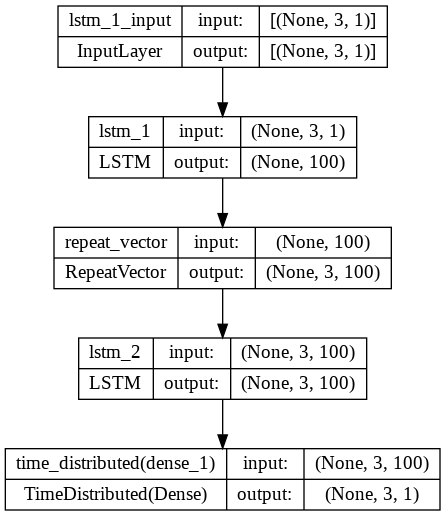

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1, batch_size=3, callbacks=[WandbCallback()])
#history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=1, batch_size=3)

Epoch 1/1000
6/6 [==============================] - 2s 81ms/step - loss: 23238.1602 - val_loss: 76056.9922
Epoch 2/1000
6/6 [==============================] - 0s 19ms/step - loss: 20912.1738 - val_loss: 65747.9844
Epoch 3/1000
6/6 [==============================] - 0s 17ms/step - loss: 16548.6465 - val_loss: 38620.7188
Epoch 4/1000
6/6 [==============================] - 0s 19ms/step - loss: 7334.1191 - val_loss: 26756.3906
Epoch 5/1000
6/6 [==============================] - 0s 17ms/step - loss: 5674.3394 - val_loss: 15188.9092
Epoch 6/1000
6/6 [==============================] - 0s 18ms/step - loss: 4100.0068 - val_loss: 12563.3652
Epoch 7/1000
6/6 [==============================] - 0s 17ms/step - loss: 3249.7751 - val_loss: 10043.4551
Epoch 8/1000
6/6 [==============================] - 0s 24ms/step - loss: 2530.6389 - val_loss: 7654.9678
Epoch 9/1000
6/6 [==============================] - 0s 17ms/step - loss: 1649.4531 - val_loss: 4160.7183
Epoch 10/1000
6/6 [==========================

In [ ]:
test_input = np.array([50, 51, 52])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)

print(test_output)
model.evaluate(X,Y)

[[[61.62098]
  [67.37461]
  [71.65091]]]
1/1 [==============================] - 0s 17ms/step - loss: 0.9748


0.9748106002807617

## Q. Create an LSTM network to replace to solve the equiation of conversion Celsius and Fahrenheit, given as following: 
<p align="center">
  <a href="url"><img src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/c-to-f-formula-1638963368.png" align="middle" height="300" width="600" ></a>
</p>


### What happens if you normalize Data ? 



### What is the job of repeatvector layer, and return _sequence parameter

What is the role of #model.add(TimeDistributed(Dense(1))) in case we activated it in the architecture of last model ? 

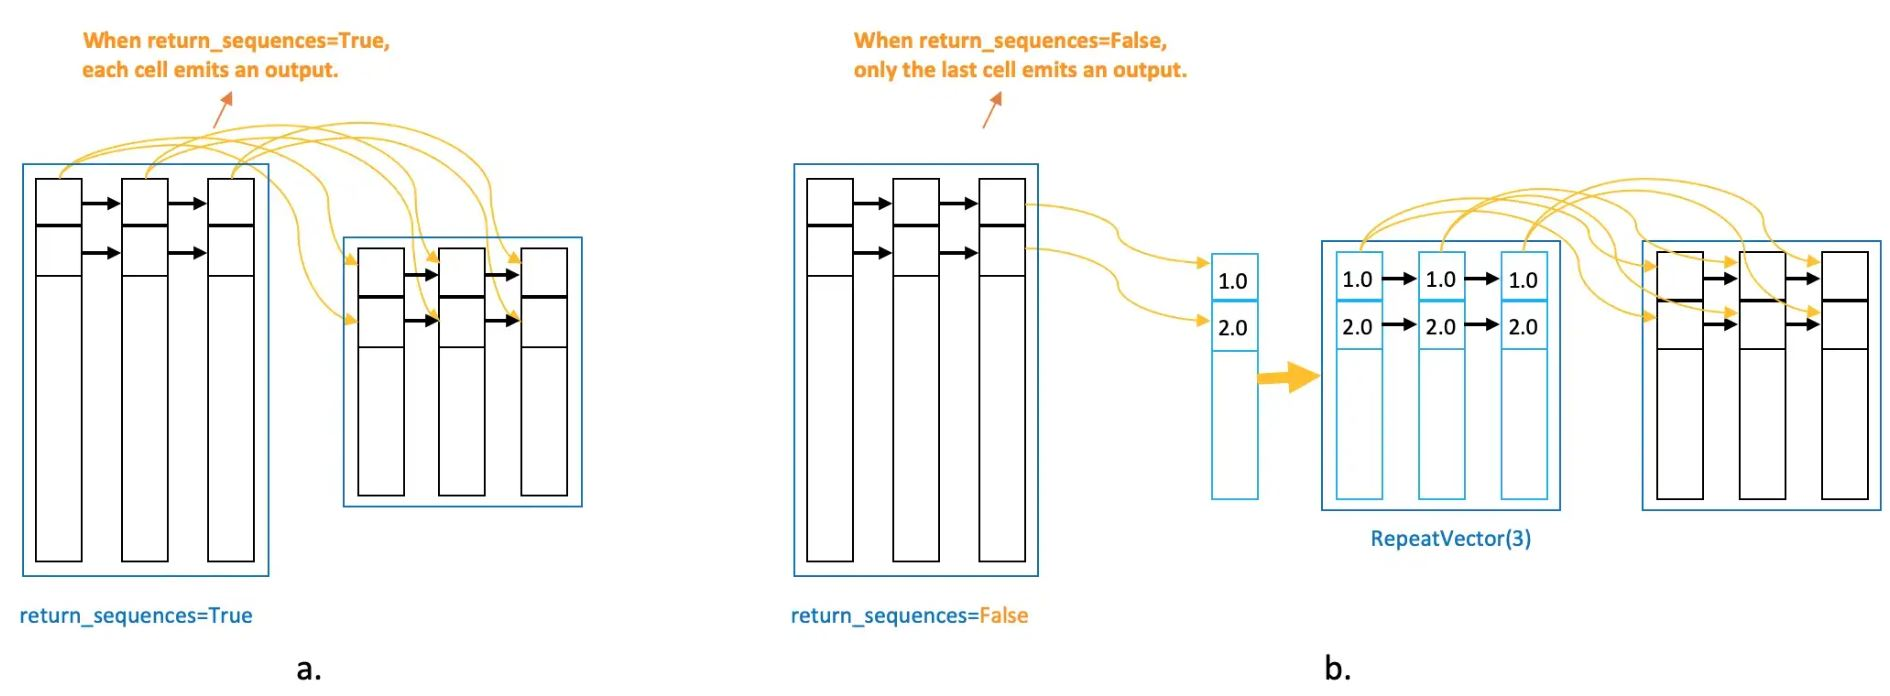